<a href="https://colab.research.google.com/github/Charan6924/MachineLearningProjects/blob/main/SupportVectorMachines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from sklearn.datasets import load_iris
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [5]:
iris = load_iris(as_frame = True)
X = iris.data[['petal length (cm)','petal width (cm)']].values
y = (iris.target == 2) #virginica
svm_clf = make_pipeline(StandardScaler(),
                        LinearSVC(C=1, random_state = 42))
svm_clf.fit(X,y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(C=1, random_state=42))])

In [6]:
X_new = [[5.5,1.7],[5.0,1.5]]
svm_clf.predict(X_new)

array([ True, False])

In [7]:
svm_clf.decision_function(X_new)

array([ 0.66163816, -0.22035761])

In [8]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures

In [10]:
X,y = make_moons(n_samples = 100,noise = 0.15, random_state = 42)

polynomial_svc_clf = make_pipeline(
    PolynomialFeatures(degree = 3),
    StandardScaler(),
    LinearSVC(C=10,max_iter = 10000, random_state = 42)
)

In [11]:
polynomial_svc_clf.fit(X,y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('standardscaler', StandardScaler()),
                ('linearsvc',
                 LinearSVC(C=10, max_iter=10000, random_state=42))])

In [13]:
from sklearn.svm import SVC
poly_kernel_clf = make_pipeline(
    StandardScaler(),
    SVC(C = 5, kernel = 'poly',degree = 3, coef0 = 1)
)
poly_kernel_clf.fit(X,y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=5, coef0=1, kernel='poly'))])

In [14]:
rbf_clf = make_pipeline(
    StandardScaler(),
    SVC(C = 0.001, kernel = 'rbf', gamma = 5)
)
rbf_clf.fit(X,y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=0.001, gamma=5))])

Training a LinearSVC, SVC and SGDClassifier on the same linearly seperable dataset

In [15]:
from sklearn import datasets

iris = datasets.load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris.target

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

In [22]:
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [23]:
C = 0.5
alpha = 0.05
sc = StandardScaler()
X = sc.fit_transform(X)
linear = LinearSVC(C = C, loss = 'hinge',random_state = 42, dual = True).fit(X,y)
svc = SVC(kernel = 'linear',C = C).fit(X,y)
sgd = SGDClassifier(alpha = alpha,random_state = 42).fit(X,y)

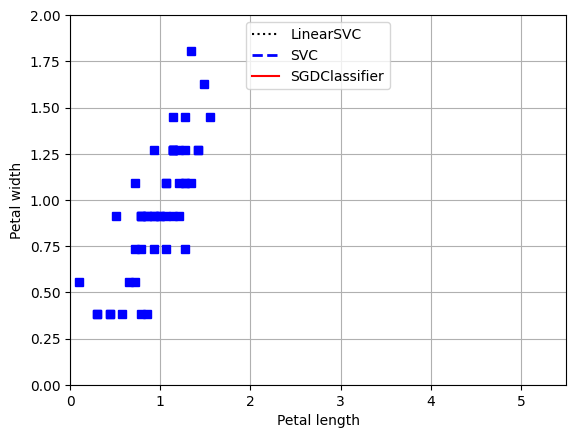

In [25]:
def compute_decision_boundary(model):
    w = -model.coef_[0, 0] / model.coef_[0, 1]
    b = -model.intercept_[0] / model.coef_[0, 1]
    return sc.inverse_transform([[-10, -10 * w + b], [10, 10 * w + b]])

lin_line = compute_decision_boundary(linear)
svc_line = compute_decision_boundary(svc)
sgd_line = compute_decision_boundary(sgd)

# Plot all three decision boundaries
plt.plot(lin_line[:, 0], lin_line[:, 1], "k:", label="LinearSVC")
plt.plot(svc_line[:, 0], svc_line[:, 1], "b--", linewidth=2, label="SVC")
plt.plot(sgd_line[:, 0], sgd_line[:, 1], "r-", label="SGDClassifier")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs") # label="Iris versicolor"
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo") # label="Iris setosa"
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="upper center")
plt.axis([0, 5.5, 0, 2])
plt.grid()

plt.show()

In [36]:
from sklearn.datasets import load_wine

wine = load_wine(as_frame = True)

In [37]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(wine.data,wine.target,random_state = 42)

In [38]:
X_train.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
100,12.08,2.08,1.70,17.5,97.0,2.23,2.17,0.26,1.40,3.30,1.27,2.96,710.0
122,12.42,4.43,2.73,26.5,102.0,2.20,2.13,0.43,1.71,2.08,0.92,3.12,365.0
154,12.58,1.29,2.10,20.0,103.0,1.48,0.58,0.53,1.40,7.60,0.58,1.55,640.0
51,13.83,1.65,2.60,17.2,94.0,2.45,2.99,0.22,2.29,5.60,1.24,3.37,1265.0


In [39]:
y_train.head()

,target
2,0
100,1
122,1
154,2
51,0


In [41]:
linear = make_pipeline(
    StandardScaler(),
    LinearSVC(dual = True,random_state = 42)
)
linear.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(dual=True, random_state=42))])

In [44]:
from sklearn.model_selection import cross_val_score

c = cross_val_score(linear, X_test, y_test, scoring = 'accuracy',cv = 3)
c.mean()

np.float64(0.9777777777777779)

In [45]:
svm_clf = make_pipeline(
    StandardScaler(),
    SVC(random_state = 42)
)
cross_val_score(svm_clf, X_test, y_test, scoring = 'accuracy',cv = 3).mean()

np.float64(0.9333333333333332)

In [46]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform, uniform

param_distrib = {
    "svc__gamma": loguniform(0.001, 0.1),
    "svc__C": uniform(1, 10)
}
rnd_search_cv = RandomizedSearchCV(svm_clf, param_distrib, n_iter=100, cv=5,
                                   random_state=42)
rnd_search_cv.fit(X_train, y_train)
rnd_search_cv.best_estimator_

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc',
                 SVC(C=np.float64(9.925589984899778),
                     gamma=np.float64(0.011986281799901188),
                     random_state=42))])

In [49]:
rnd_search_cv.best_score_

np.float64(0.9925925925925926)

In [47]:
rnd_search_cv.best_estimator_.score(X_test,y_test)

0.9777777777777777

In [55]:
from sklearn.datasets import fetch_california_housing
from sklearn.svm import LinearSVR
cali = fetch_california_housing()

X_train,X_test,y_train,y_test = train_test_split(cali.data,cali.target,random_state = 42,test_size = 0.2)

In [62]:
pipeline = make_pipeline(
    StandardScaler(),
    LinearSVR(max_iter=5000, dual=True, random_state=42)
)

pipeline.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvr',
                 LinearSVR(dual=True, max_iter=5000, random_state=42))])

In [65]:
from sklearn.metrics import root_mean_squared_error

y_pred = pipeline.predict(X_train)
rmse = root_mean_squared_error(y_train,y_pred)
rmse

0.979565447829459